# Homework 1
Lucas Bezerra, 171412

lucas.camaradantasbezerra@kaust.edu.sa

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch

## Problem 1: Generative Adversarial Networks

1.

Please check the file "Derivations.pdf", page 1

2.

In [22]:
x = np.linspace(1e-3,1-1e-3,int(1e3))
dx = x[1]-x[0]

Minimax Loss

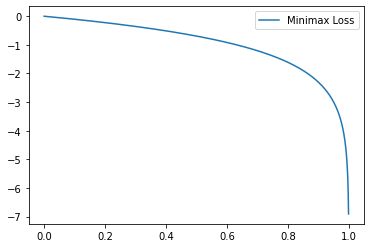

In [23]:
mm_loss = np.log(1-x)
plt.plot(x,mm_loss,label="Minimax Loss");
plt.legend();
plt.show();

Minimax Loss

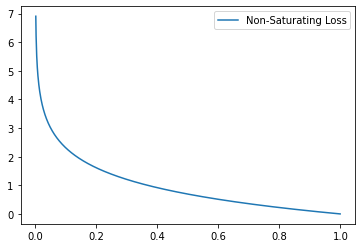

In [24]:
ns_loss = -np.log(x)
plt.plot(x,ns_loss,label="Non-Saturating Loss");
plt.legend();
plt.show();

Non-Saturating Loss

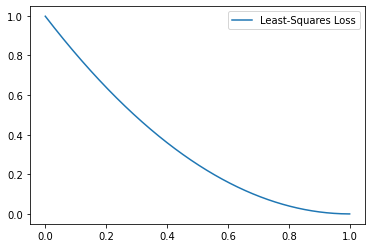

In [26]:
ls_loss = np.power(x-1,2)
plt.plot(x,ls_loss,label="Least-Squares Loss");
plt.legend();
plt.show();

Least-Squares Loss

**Why does the non-saturating loss prevent the vanishing gradient problem?**

The vanishing gradient problem occurs when $h_\phi\left( G_\theta(z) \right) \to -\infty$ (i.e. the discriminator successfully identifies fake images), at which point the derivative with respect to $\theta$ is very small. Since learning and improving relies on gradient descent, the generator won't be able to improve and won't escape that region. Alternatively, the non-saturating loss shows large derivatives when $h_\phi\left( G_\theta(z) \right) \to -\infty$, allowing the generator to improve and escape such regions faster, while presenting smaller derivatives when $h_\phi\left( G_\theta(z) \right) \to +\infty$ (i.e. the discriminator can't distinguish fake from real data), where the generator is much better than the discriminator and the learning process can take a slower pace.

3.

Please check the provided Jupyter notebook.

## Problem 2: KL Divergence

Please check the file "Derivations.pdf", page 2

## Problem 3: Creative Adversarial Networks

1.

The term: 

$$-\sum\limits_{k=1}^K\frac{1}{K}\text{log}\left( D_c(c_k\,|\,G(z) ) \right) + \left( 1-\frac{1}{K} \right)\text{log}\left( 1 - D_c(c_k\,|\,G(z) ) \right)$$

is called the creativity loss, and basically implements Binary Cross Entropy (BCE) for every class $c_k, k=1,2,\dots,K$. These terms encourage the generator to create data that does not belong to any of the existing classes, and thus encouraging novelty. Mathematically, the generator tries to maximize the entropy of the descriminator classifications for all classes; the optimal solution for this problem is to have $D_c(c_k\,|\,G(z) ) = \frac{1}{K}, \forall k$ (i.e. the descriminator thinks the image is equally likely to belong to any of the classes).

However, that alone would lead the generator to produce samples that might not make any sense, since it pushes samples away from all seen data. That's why the original generator loss: 

$$\mathbb{E}_{z\sim p_z}\left[ \text{log}\left( 1 - D_r(G(z)) \right) \right]$$

is maintained. The discriminator not only classifies which style the sample belongs to, but also whether it is real or not. The generator thus has the job of generating samples that seem real to the discriminator, but also seem not to belong to any of the other classes (or all of them equally). This balance is inspired by the Wundt curve, which shows that the most pleasing works of art are not cliché (show novelty) but also not too innovative to the point of being unrelatable (not that much novelty).

2.

Not only MCE requires less compute resources than BCE, it acts on the joint distribution of the discriminator classifications, instead of each class sepparately. The paper shows that it is proportional to a KL divergence loss between a uniform distribution (maximum entropy) and the output of the discriminator, which creates a bridge between the work and the vast field of measure theory, allowing other divergence measures to be applied (e.g. Generalized Sharma-Mittal Divergence).